In [2]:
# -*- coding: utf-8 -*-
# Kaggle Notebook: Self-generated datasets (classification + regression)
# Safe to run multiple times; files will overwrite in /kaggle/working

import os
import json
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, mean_squared_error, r2_score
)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Output directory for Kaggle
OUT_DIR = "/kaggle/working"
os.makedirs(OUT_DIR, exist_ok=True)

print("Environment ready. Writing datasets to:", OUT_DIR)

# 1) Synthetic classification dataset
X_cls, y_cls = make_classification(
    n_samples=5000,
    n_features=25,
    n_informative=8,
    n_redundant=5,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights=[0.7, 0.3],  # imbalanced to reflect real-world scenarios
    class_sep=1.2,
    flip_y=0.02,
    random_state=SEED
)

cls_cols = [f"feat_{i:02d}" for i in range(X_cls.shape[1])]
df_cls = pd.DataFrame(X_cls, columns=cls_cols)
df_cls["target"] = y_cls

# Add some categorical noise/features to test pipelines
n = len(df_cls)
df_cls["region"] = np.random.choice(["APAC", "EMEA", "AMER"], size=n, p=[0.33, 0.34, 0.33])
df_cls["channel"] = np.random.choice(["web", "mobile", "api"], size=n, p=[0.5, 0.3, 0.2])

# Save classification dataset
cls_path = os.path.join(OUT_DIR, "synthetic_classification.csv")
df_cls.to_csv(cls_path, index=False)
print(f"Classification dataset saved: {cls_path} | shape={df_cls.shape}")

# 2) Synthetic regression dataset
X_reg, y_reg = make_regression(
    n_samples=4000,
    n_features=15,
    n_informative=6,
    noise=12.0,
    random_state=SEED
)

reg_cols = [f"rfeat_{i:02d}" for i in range(X_reg.shape[1])]
df_reg = pd.DataFrame(X_reg, columns=reg_cols)
df_reg["target"] = y_reg

# Add seasonality-like signal and categorical feature
t = np.arange(len(df_reg))
df_reg["seasonal"] = np.sin(2 * np.pi * t / 365.0) + np.random.normal(0, 0.2, size=len(df_reg))
df_reg["segment"] = np.random.choice(["A", "B", "C"], size=len(df_reg), p=[0.4, 0.4, 0.2])

# Save regression dataset
reg_path = os.path.join(OUT_DIR, "synthetic_regression.csv")
df_reg.to_csv(reg_path, index=False)
print(f"Regression dataset saved: {reg_path} | shape={df_reg.shape}")

# Save a small metadata manifest
manifest = {
    "classification": {"path": cls_path, "rows": int(df_cls.shape[0]), "cols": int(df_cls.shape[1])},
    "regression": {"path": reg_path, "rows": int(df_reg.shape[0]), "cols": int(df_reg.shape[1])},
    "seed": SEED
}
with open(os.path.join(OUT_DIR, "dataset_manifest.json"), "w") as f:
    json.dump(manifest, f, indent=2)

print("Manifest written.")

Environment ready. Writing datasets to: /kaggle/working
Classification dataset saved: /kaggle/working/synthetic_classification.csv | shape=(5000, 28)
Regression dataset saved: /kaggle/working/synthetic_regression.csv | shape=(4000, 18)
Manifest written.


Classification head:


,feat_00,feat_01,feat_02,feat_03,feat_04,feat_05,feat_06,feat_07,feat_08,feat_09,...,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,target,region,channel
0,-0.025379,-0.664578,-1.507559,2.585605,-6.230349,-1.536921,-1.429866,-0.476628,0.181687,1.870741,...,-0.035578,0.577854,4.231265,0.394074,0.189561,-1.285747,-0.581689,0,EMEA,web
1,-0.217985,-0.758736,-1.091191,-3.192401,4.740094,0.638083,0.877867,0.623306,-0.359170,-3.886299,...,-0.643365,-0.922852,-6.278912,-4.129846,-0.466354,0.551751,0.062015,1,AMER,web
2,-0.757641,-2.012712,2.076373,-2.488664,0.400854,0.648027,0.076951,-0.145718,-0.240853,-2.757133,...,-0.300630,-0.027263,-4.165660,1.648587,-1.138890,1.669310,0.119586,1,AMER,api
3,0.424413,0.174556,-0.765697,0.234894,-7.470400,-0.511869,1.001647,0.657527,-0.200015,2.519384,...,1.155335,4.175713,0.756194,4.043669,0.301167,0.388752,-1.165283,1,EMEA,web
4,-1.242761,-2.638051,2.005654,0.682855,3.050691,1.016375,-0.072425,0.473867,0.394162,-0.068995,...,0.881466,-0.821820,0.504061,3.344139,0.257417,0.549249,0.363393,0,APAC,api


Regression head:


,rfeat_00,rfeat_01,rfeat_02,rfeat_03,rfeat_04,rfeat_05,rfeat_06,rfeat_07,rfeat_08,rfeat_09,rfeat_10,rfeat_11,rfeat_12,rfeat_13,rfeat_14,target,seasonal,segment
0,0.593181,-0.006580,-1.208506,0.810415,1.044175,0.843148,0.059304,1.002222,1.347181,0.299469,0.565291,1.180124,-0.010190,0.437767,-0.223245,139.495365,-0.297572,A
1,0.994415,0.681634,0.570946,0.605514,0.273911,-1.422235,1.220551,0.570486,-1.523172,-0.814403,2.013554,-2.191979,0.064408,0.014108,0.244098,-101.430313,-0.207824,B
2,-0.379787,-2.216121,1.465726,-0.839352,-1.820850,0.059466,0.606085,1.292407,0.335754,-0.040592,-0.725475,-1.455965,-0.698210,-2.154384,-0.793473,-409.699403,0.112185,B
3,-0.935046,1.395271,2.196738,0.431436,-0.540478,2.146813,-1.136091,0.585586,-0.979103,0.072862,0.451091,-0.591808,-1.386728,-0.369347,1.916299,232.748371,-0.183155,B
4,0.883805,-1.798961,0.006596,-0.341534,0.753220,0.547538,0.083822,-0.455134,0.199709,-0.343743,-1.083710,-0.082691,-1.005129,-0.962379,-0.603322,-233.228198,0.291329,B



Classification target distribution:
target
0    0.6944
1    0.3056
Name: ratio, dtype: float64


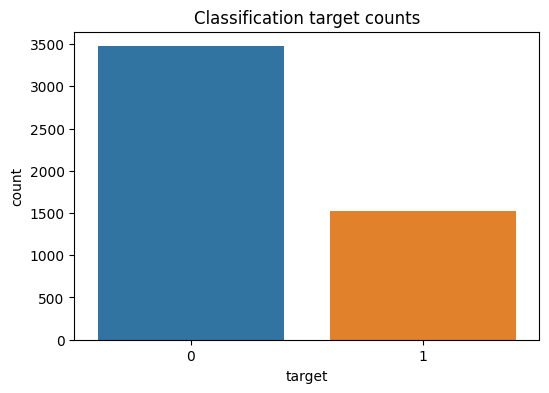

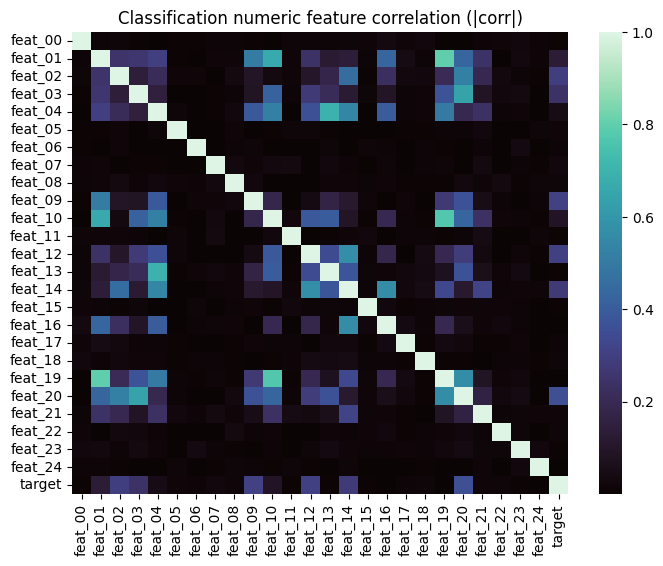

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


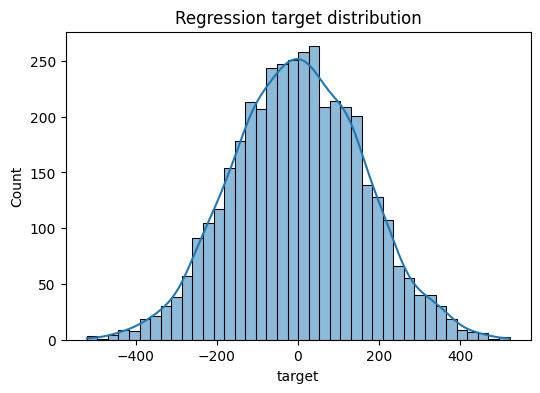

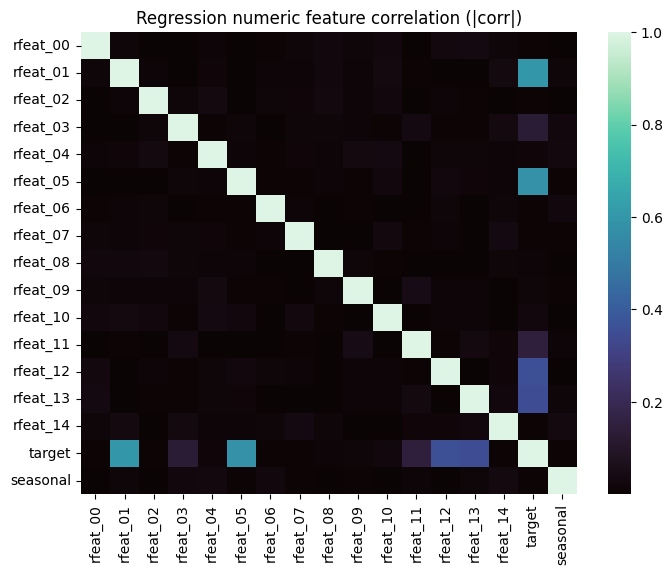

In [3]:
# Load datasets (simulate a fresh session)
df_cls = pd.read_csv("/kaggle/working/synthetic_classification.csv")
df_reg = pd.read_csv("/kaggle/working/synthetic_regression.csv")

print("Classification head:")
display(df_cls.head())

print("Regression head:")
display(df_reg.head())

# Basic EDA: classification
print("\nClassification target distribution:")
print(df_cls["target"].value_counts(normalize=True).rename("ratio"))

plt.figure(figsize=(6,4))
sns.countplot(data=df_cls, x="target")
plt.title("Classification target counts")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df_cls.select_dtypes(include=np.number).corr().abs(), cmap="mako", cbar=True)
plt.title("Classification numeric feature correlation (|corr|)")
plt.show()

# Basic EDA: regression
plt.figure(figsize=(6,4))
sns.histplot(df_reg["target"], bins=40, kde=True)
plt.title("Regression target distribution")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df_reg.select_dtypes(include=np.number).corr().abs(), cmap="mako", cbar=True)
plt.title("Regression numeric feature correlation (|corr|)")
plt.show()


[Logistic] ACC=0.8096 | PREC=0.6636 | REC=0.7644 | F1=0.7105 | AUC=0.8692

[RandomForest] ACC=0.9504 | PREC=0.9598 | REC=0.8743 | F1=0.9151 | AUC=0.9705


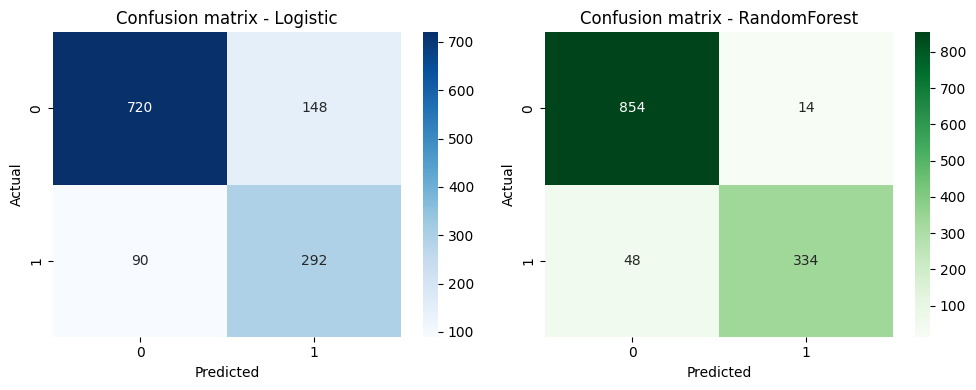

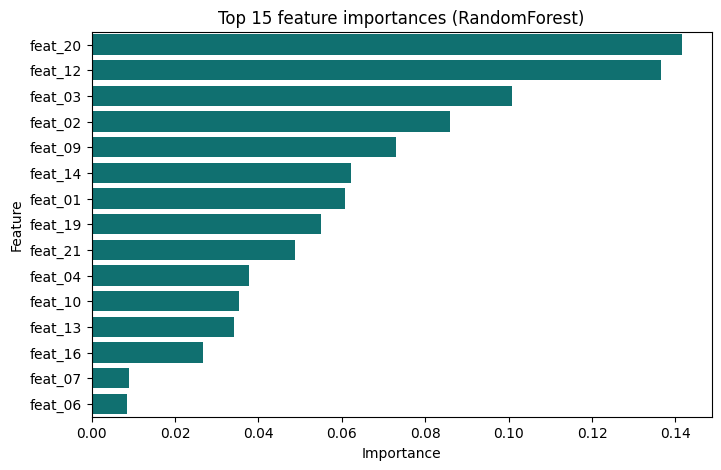

In [4]:
# One-hot encode categorical features
dfc = df_cls.copy()
cat_cols = ["region", "channel"]
dfc = pd.get_dummies(dfc, columns=cat_cols, drop_first=True)

X = dfc.drop(columns=["target"])
y = dfc["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=SEED, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline: Logistic Regression
log_clf = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=SEED)
log_clf.fit(X_train_scaled, y_train)
y_pred_log = log_clf.predict(X_test_scaled)
y_proba_log = log_clf.predict_proba(X_test_scaled)[:, 1]

# Stronger model: RandomForest
rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=SEED,
    n_jobs=-1
)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

def cls_report(y_true, y_pred, y_proba, label):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_proba)
    print(f"\n[{label}] ACC={acc:.4f} | PREC={prec:.4f} | REC={rec:.4f} | F1={f1:.4f} | AUC={auc:.4f}")

cls_report(y_test, y_pred_log, y_proba_log, "Logistic")
cls_report(y_test, y_pred_rf, y_proba_rf, "RandomForest")

# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(10,4))
cm_log = confusion_matrix(y_test, y_pred_log)
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion matrix - Logistic")
axes[0].set_xlabel("Predicted"); axes[0].set_ylabel("Actual")

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Confusion matrix - RandomForest")
axes[1].set_xlabel("Predicted"); axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# Feature importance (RandomForest)
importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
topk = importances.head(15)

plt.figure(figsize=(8,5))
sns.barplot(x=topk.values, y=topk.index, orient="h", color="teal")
plt.title("Top 15 feature importances (RandomForest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


[LinearRegression] RMSE=11.781 | R2=0.9946

[RandomForestRegressor] RMSE=42.048 | R2=0.9313


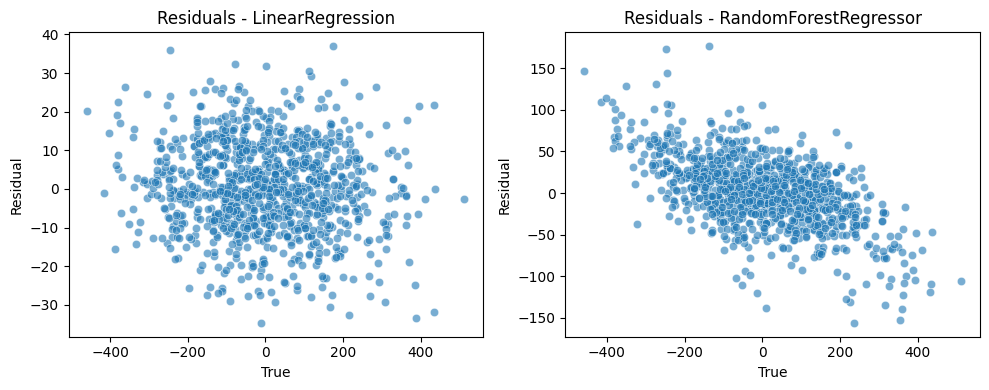

Models saved to /kaggle/working.


In [5]:
# One-hot encode categorical features
dfr = df_reg.copy()
cat_cols_reg = ["segment"]
dfr = pd.get_dummies(dfr, columns=cat_cols_reg, drop_first=True)

Xr = dfr.drop(columns=["target"])
yr = dfr["target"]

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    Xr, yr, test_size=0.25, random_state=SEED
)

scaler_r = StandardScaler()
Xr_train_scaled = scaler_r.fit_transform(Xr_train)
Xr_test_scaled = scaler_r.transform(Xr_test)

# Baseline: Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(Xr_train_scaled, yr_train)
yr_pred_lin = lin_reg.predict(Xr_test_scaled)

# Stronger model: RandomForestRegressor
rf_reg = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=SEED,
    n_jobs=-1
)
rf_reg.fit(Xr_train, yr_train)
yr_pred_rf = rf_reg.predict(Xr_test)

def reg_report(y_true, y_pred, label):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    print(f"\n[{label}] RMSE={rmse:.3f} | R2={r2:.4f}")

reg_report(yr_test, yr_pred_lin, "LinearRegression")
reg_report(yr_test, yr_pred_rf, "RandomForestRegressor")

# Residual plots
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.scatterplot(x=yr_test, y=yr_pred_lin - yr_test, alpha=0.6, ax=axes[0])
axes[0].set_title("Residuals - LinearRegression"); axes[0].set_xlabel("True"); axes[0].set_ylabel("Residual")

sns.scatterplot(x=yr_test, y=yr_pred_rf - yr_test, alpha=0.6, ax=axes[1])
axes[1].set_title("Residuals - RandomForestRegressor"); axes[1].set_xlabel("True"); axes[1].set_ylabel("Residual")

plt.tight_layout()
plt.show()

# Save trained models (optional)
import joblib
joblib.dump(rf_clf, os.path.join(OUT_DIR, "rf_classifier.joblib"))
joblib.dump(rf_reg, os.path.join(OUT_DIR, "rf_regressor.joblib"))
print("Models saved to /kaggle/working.")